<a href="https://colab.research.google.com/github/Celes-ovo/Keras/blob/main/keras_7%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. 케라스의 함수형 API

Sequrntial 모델 : 네트워크의 입출력이 각각 하나라고 가정한 모델 (입출력 하나에, layer들을 챡챡챡 쌓는 모델)

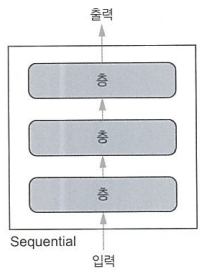

많은 경우에는 이 가정이 맞지만, 그렇지 않은 경우가 있다.   
일부 네트워크는 개별 입력이나 출력이 여러 개 필요하며, 층을 차례대로 쌓지 않고 층 사이를 연결하여 그래프처럼 만드는 네트워크도 있음!

#2. 예 : 중고 의류의 시장 가격을 예측하는 모델  (* 다중 입력 모델, 다중 출력 모델)

입력 : 메타데이터(의류 브랜드, 연도 등), 사용자가 제공한 텍스트 설명, 제품의 사진

책에서 사용한 다중 입력 모델


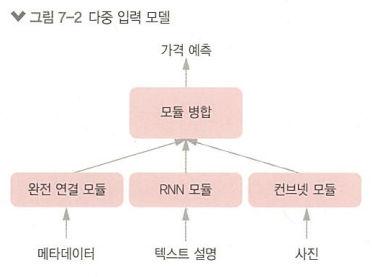

> 메타데이터 : 원 - 핫 인코딩 + fully connected network   
텍스트 설명 : RNN 또는 1D 컨브넷   
사진 이미지 : 2D 컨브넷   
가능한 모든 종류의 입력 데이터를 동시에 사용해 3개의 모델을 각각 따로 훈련하고, 각 예측을 가중 평균(weighted average)한다.

* 가중 산술 평균 : 자료의 평균을 구할 때 자료 값의 중요도나 영향 정도에 해당하는 가중치를 반영하여 구한 평균값

다중 출력 모델

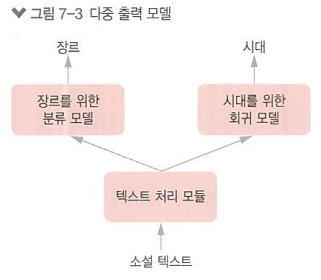

#3. 네트워크 토폴로지(network topology)

컴퓨터 네트워크의 요소들(링크, 노드 등)을 물리적으로 연결해 놓은 것, 또는 그 연결 방식을 말한다.   
선형적이지 않은, 비순환 유향 그래프 같은 네트워크 구조이다.

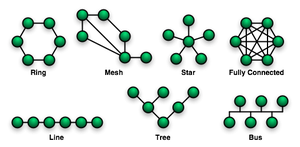

#대표적인 예 : 인셉션 네트워크

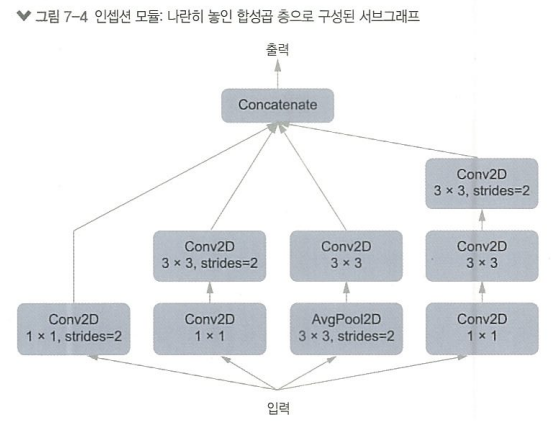

#4. 잔차 연결

하위 층의 출력 텐서를 상위 층의 출력 텐서에 더해서  아래층의 표현이 네트워크 위쪽으로 흘러갈 수 있도록 함.    
→ 하위 층에서 학습된 정보가 데이터 처리 과정에서 손실되는 것을 방지.

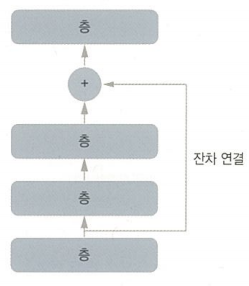

* 표현 병목, 그래디언트 소실 문제

1. 표현 병목 : 히든 레이어의 히든 유닛 수가 너무 적어지면 앞선 레이어의 출력을 다 받아낼 만큼의 충분한 용량을 갖기 힘들다.   
이런 경우 기울기(gradient)가 잘 전달되어도 용량 자체가 작아서 다음 레이어에 전달할 수 있는 정보가 줄어들게 되어    
'표현 병목'이라는 현상이 발생하게 된다.   
즉 잔차 연결을 통해 본래 데이터에 더 가까운 값을 더해줌으로써 손실을 만회해준다. 

2. 그래디언트 소실 문제 : 역전파는 출력 손실에서 얻은 피드백 신호를 하위 층에 전파한다.   
피드백 신호가 깊이 쌓인 층을 통과하여 전파되면 신호가 아주 작아지거나 완전히 사라질 수도 있다.    
이렇게 되면 네트워크가 훈련되지 않는데 이런 것을 '그래디언트 소실 문제'라고 한다.   
 이 문제는 심층 신경망과 순환 신경망에서 모두 나타나며 양쪽 모두 피드백 신호가 일련의 긴 연산을 통과하여 전파되기 때문이다. 

> 출처 : https://dong-life.tistory.com/26

전체적으로 내용에 조금 더 이해가 필요할 듯하다.

#5. 함수형 API

* 직접 텐서의 입출력을 다룬다
* 함수처럼 층을 사용하여 텐서를 입력하고 출력한다.

In [ ]:
from keras import Input, layers

input_tensor = Input(shape = (32, ))
dense = layers.Dense(32, activation = 'relu')

output_tensor = dense(input_tensor)

#6. sequential model과 함수형 API의 비교

In [ ]:
from keras.models import Sequential, Model
from keras import layers
from keras import Input

seq_model = Sequential()
seq_model.add(layers.Dense(32, activation = 'relu', input_shape = (64, )))
seq_model.add(layers.Dense(32, activation = 'relu'))
seq_model.add(layers.Dense(10, activation = 'softmax'))

input_tensor = Input(shape = (64, ))

x = layers.Dense(32, activation = 'relu')(input_tensor)
x = layers.Dense(32, activation = 'relu')(x)
output_tensor = layers.Dense(10, activation = 'softmax')(x)

model = Model(input_tensor, output_tensor)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 64)]              0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_12 (Dense)             (None, 10)                330       
Total params: 3,466
Trainable params: 3,466
Non-trainable params: 0
_________________________________________________________________


Model 객체를 사용한 컴파일, 훈련, 평가 API는 Sequential 클래스와 같다.

In [ ]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy')

import numpy as np

x_train = np.random.random((1000, 64))
y_train = np.random.random((1000, 10))

model.fit(x_train, y_train, epochs = 10, batch_size = 128)

score = model.evaluate(x_train, y_train)

Epoch 1/10
8/8 [==============================] - 1s 2ms/step - loss: 11.8588
Epoch 2/10
8/8 [==============================] - 0s 1ms/step - loss: 12.7529
Epoch 3/10
8/8 [==============================] - 0s 1ms/step - loss: 13.9350
Epoch 4/10
8/8 [==============================] - 0s 2ms/step - loss: 15.5602
Epoch 5/10
8/8 [==============================] - 0s 1ms/step - loss: 17.9600
Epoch 6/10
8/8 [==============================] - 0s 2ms/step - loss: 20.7446
Epoch 7/10
8/8 [==============================] - 0s 2ms/step - loss: 23.5346
Epoch 8/10
8/8 [==============================] - 0s 1ms/step - loss: 27.3476
Epoch 9/10
8/8 [==============================] - 0s 1ms/step - loss: 30.9910
Epoch 10/10
32/32 [==============================] - 0s 809us/step - loss: 37.2875


#7. 다중 입력 모델

함수형 API는 다중 입력 모델을 만드는 데 쓸 수 있다.   
텐서를 더하거나 이어붙이는 식으로 많이 표현.

대표적으로 많이 쓰이는 함수 = keras.layers.add, keras.layers.concatenate 등

#8. 아주 간단한 다중 입력 모델 : 질문 - 응답 모델 (question - answering model)

이 모델은 2개의 입력을 가진다.
* 자연어 질문
* 답변에 필요한 정보가 담겨 있는 텍스트(신문 기사 등)



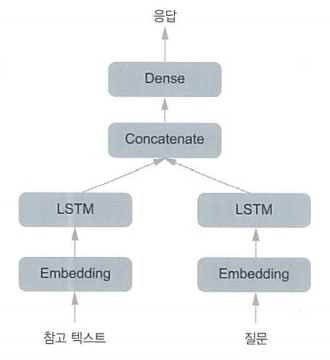

In [ ]:
from keras.models import Model
from keras import layers
from keras import Input
import tensorflow as tf

text_vocabulary_size = 10000
question_vocabulary_size = 10000
answer_vocabulary_size = 500

text_input = Input(shape=(None,), dtype='int32', name='text')
embedded_text = layers.Embedding(text_vocabulary_size, 64)(text_input)
encoded_text = layers.LSTM(32)(embedded_text)

question_input = Input(shape=(None,), dtype='int32', name='question')
embedded_question = layers.Embedding(question_vocabulary_size, 32)(question_input)
encoded_question = layers.LSTM(16)(embedded_question)

concatenated = layers.concatenate([encoded_text, encoded_question], axis=-1)

answer = layers.Dense(answer_vocabulary_size, activation='softmax')(concatenated)

model = Model([text_input, question_input], answer)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
import numpy as np
from keras.utils import to_categorical

num_samples = 1000
max_length = 100

text = np.random.randint(1, text_vocabulary_size, size=(num_samples, max_length))
question = np.random.randint(1, question_vocabulary_size, size=(num_samples, max_length))
answers = np.random.randint(0, answer_vocabulary_size, size=num_samples)
answers = to_categorical(answers)

# 리스트를 이용하여 학습
model.fit([text, question], answers, epochs=10, batch_size=128)

# 딕셔너리를 이용하여 학습 - 입력 이름을 지정했을 때만 사용할 수 있다.
#model.fit({'text': text, 'question':question}, answers, epochs=10, batch_size=128)

Epoch 1/10
8/8 [==============================] - 5s 116ms/step - loss: 6.2143 - acc: 0.0000e+00
Epoch 2/10
8/8 [==============================] - 1s 114ms/step - loss: 6.1955 - acc: 0.0371
Epoch 3/10
8/8 [==============================] - 1s 115ms/step - loss: 6.1232 - acc: 0.0024
Epoch 4/10
8/8 [==============================] - 1s 113ms/step - loss: 6.0241 - acc: 0.0041
Epoch 5/10
8/8 [==============================] - 1s 112ms/step - loss: 5.9584 - acc: 0.0101
Epoch 6/10
8/8 [==============================] - 1s 111ms/step - loss: 5.8811 - acc: 0.0259
Epoch 7/10
8/8 [==============================] - 1s 111ms/step - loss: 5.8099 - acc: 0.0173
Epoch 8/10
8/8 [==============================] - 1s 110ms/step - loss: 5.7518 - acc: 0.0193
Epoch 9/10
8/8 [==============================] - 1s 113ms/step - loss: 5.6685 - acc: 0.0266
Epoch 10/10
8/8 [==============================] - 1s 113ms/step - loss: 5.6079 - acc: 0.0269


#9. 다중 출력 모델 - ???

In [ ]:
from keras import layers
from keras import Input
from keras.models import Model

vocabulary_size = 50000
num_income_groups = 10

posts_input = Input(shape=(None,), dtype='int32', name='posts')
embedded_posts = layers.Embedding(vocabulary_size, 256)(posts_input)
x = layers.Conv1D(128, 5, activation='relu')(embedded_posts)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(256, 5, activation='relu')(x)
x = layers.Conv1D(256, 5, activation='relu')(x)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(256, 5, activation='relu')(x)
x = layers.Conv1D(256, 5, activation='relu')(x)
x = layers.MaxPooling1D()(x)
x = layers.Dense(128, activation='relu')(x)

age_prediction = layers.Dense(1, name='age')(x)
income_prediction = layers.Dense(num_income_groups, activation='softmax', name='income')(x)
gender_prediction = layers.Dense(1, activation='sigmoid', name='gender')(x)

model = Model(posts_input, [age_prediction, income_prediction, gender_prediction])

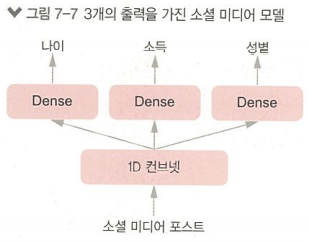

In [ ]:
# 리스트를 이용한 방식
model.compile(optimizer='rmsprop',
              loss=['mse', 'categorical_crossentropy', 'binary_crossentropy'])

# 딕셔너리를 이용한 방식 - 출력 층에 이름을 지정했을 때만 사용할 수 있다.
model.compile(optimizer='rmsprop',
              loss={'age':'mse', 'income':'categorical_crossentropy', 'gender':'binary_crossentropy'})

In [ ]:
# 리스트를 이용한 방식
model.fit(posts_input, [age_prediction, income_prediction, gender_prediction],
          epochs=10, batch_size=64)

# 딕셔너리를 이용한 방식
model.fit(posts_input, {'age':age_prediction, 'income':income_prediction,
                        'gender':gender_prediction}, epochs=10, batch_size=64)

TypeError: ignored

#10. 층으로 구성된 비순환 유향 그래프

비순환 : 원형을 띨 수 없다.   
텐서 x가 자기 자신을 출력하는 층의 입력이 될 수 없다.

가장 유명한 신경망 컴포넌트 2개 : 인셉션 모듈, 잔차 연결이 있다.

#11. 인셉션 모듈(GoogLeNet)

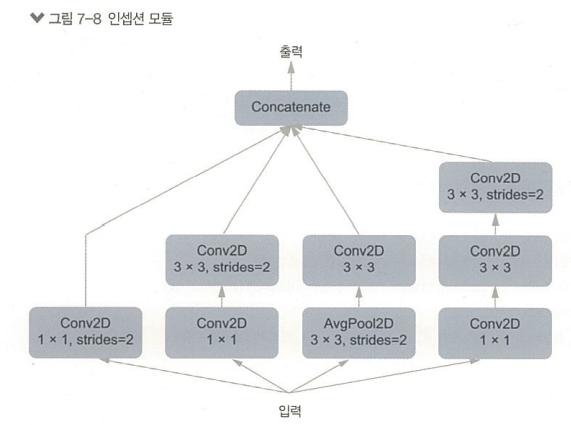

1x1 사이즈의 3~4개의 가지로 시작해서 3x3 합성곱이 뒤따르고 마지막에 전체 출력 특성이 합쳐짐.   
한꺼번에 학습하는 것보다 효과가 더 높음!

더 복잡한 인셉션 모듈은 풀링 연산, 여러 가지 합성곱 사이즈, 공간 합성곱이 없는 가지로 구성될 수 있다.

#+  1x1 합성곱   

입력 텐서에서 타일 주변의 패치를 추출하고 각 패치에 동일한 연산 수행.


모든 타일 벡터를 하나의 Dense 층에 통과시키는 것과 동일하다.   
####결정적인 이유는 차원을 줄이는 것이라고 한다.

In [ ]:
# 인셉션 모델

from keras import layers

branch_a = layers.Conv2D(128, 1, activation='relu', strides=2)(x)

branch_b = layers.Conv2D(128, 1, activation='relu')(x)
branch_b = layers.Conv2D(128, 3, activation='relu', strides=2)(branch_b)  # stride = 2

branch_c = layers.AveragePooling2D(3, strides=2)(x)
branch_c = layers.Conv2D(128, 3, activation='relu')(branch_c)

branch_d = layers.Conv2D(128, 1, activation='relu')(x)
branch_d = layers.Conv2D(128, 3, activation='relu')(branch_d)
branch_d = layers.Conv2D(128, 3, activation='relu', strides=2)(branch_d)

output = layers.concatenate([branch_a, branch_b, branch_c, branch_d], axis=1)

#12. 잔차 연결

하위 층의 출력을 상위 층의 입력으로 사용   
→ 순서대로 놓인 네트워크를 질러가는 연결이 만들어짐

하위 층이 상위 층의 활성화 출력에 연결되는 것이 아니라 더해진다.

대규모 딥러닝 모델에서 흔히 나타나는 두 가지 문제인 그래디언트 소실과 표현 병목(representational bottleneck)을 해결한다고 한다.

In [ ]:
# 특성 맵의 크기가 같을 때 원본을 그대로 사용하는 잔차 연결
from keras import layers

x = ...

y = layers.Conv2D(128, 3, activation='relu', padding='same')(x)
y = layers.Conv2D(128, 3, activation='relu', padding='same')(x)
y = layers.Conv2D(128, 3, activation='relu', padding='same')(x)

y = layers.add([y, x])

In [ ]:
# 특성 맵의 크기가 다를 때 선형 변환을 사용하여 구현한 잔차 연결

from keras import layers

x = ...

y = layers.Conv2D(128, 3, activation='relu', padding='same')(x)
y = layers.Conv2D(128, 3, activation='relu', padding='same')(x)
y = layers.MaxPooling2D(2, strides=2)(y)

residual = layers.Conv2D(128, 1, strides=2, padding='same')(x)

y = layers.add([y, residual])

#13. 딥러닝의 표현 병목

어떤 층의 크기가 너무 작을 경우 -> 다음 층으로 가는 정보의 양이 적어진다 -> 데이터 병목 현상   


잔차 연결은 이 문제를 어느 정도 해결해 준다.

#14. 딥러닝의 그래디언트 소실(vanishing gradient)

층이 너무 깊게 쌓여 있을 경우 -> 피드백 신호의 크기가 매우 작아지거나 없어질 수 있다 -> 그래디언트 소실    



잔차 연결은 이 문제를 어느 정도 해결해 준다.

#15. 층 가중치 공유

함수형 API의 중요한 기능 : 층 객체를 여러 번 재사용할 수 있다.    
층 객체를 두 번 호출할 경우 새로운 층 객체를 만들지 않고 각 호출에 동일한 가중치를 재사용한다.   


이런 기능 때문에 공유형 가지를 가진 모델을 만드는 게 가능

###예시) 두 문장 사이의 의미가 비슷한지 측정하는 모델

In [ ]:
from keras import layers
from keras import Input
from keras.models import Model

lstm = layers.LSTM(32)
left_input = Input(shape=(None, 128))
left_output = lstm(left_input)

right_input = Input(shape=(None, 128))
right_output = lstm(right_input)

merged = layers.concatenate([left_output, right_output], axis = -1)
predictions = layers.Dense(1, activation = 'sigmoid')(merged)

model = Model([left_input, right_input], predictions)
model.fit([left_data, right_data], targets)

#16. 층과 모델

함수형 API에서는 모델을 층처럼 사용할 수 있다 -> 모델을 커다른 층으로 생각해도 됨.

어떤 네트워크를 하나 만들었고, 그 네트워크를 여러 군데에서 사용한다 할 때,   
각각의 독립된 네트워크를 구축할 필요가 없다.

In [ ]:
from keras import layers
from keras import applications
from keras import Input

xception_base = applications.Xception(weights = None, include_top = False)

left_input = Input(shape =(250, 250, 3))
right_input = Input(shape =(250, 250, 3))

left_features = xception_base(left_input)
right_input = xception_base(right_input)

merged_features = layers.concatenate([left_features, right_input], axis = -1)

#17. 정리

* 차례대로 층을 쌓는 것 이상이 필요할 때는 Sequential API를 사용하지 않습니다.


* 함수형 API : 다중 입력, 다중 출력, 복잡한 네트워크 토폴로지를 갖는 케라스 모델 만들기


* 다른 네트워크 가지에서 같은 층이나 모델 객체를 여러 번 호출하여 가중치를 재사용하는 방법